In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os 
import math
burritos = pd.read_csv("/Users/brindamunuswamy/Desktop/Dashmote/burritos_01022018.csv",skipinitialspace=True) 
# read CSV into pandas
burritos.describe() # check vital statistics of the dataset

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Queso
count,82.000000,82.000000,378.000000,382.000000,22.000000,22.000000,251.000000,249.000000,249.000000,385.000000,365.000000,373.000000,383.000000,377.000000,383.000000,363.000000,383.000000,383.000000,383.000000,0.0
mean,3.898780,4.174390,7.048280,3.499895,546.181818,0.675277,20.072988,22.098996,0.785462,3.486104,3.741096,3.596247,3.527546,3.564403,3.422324,3.348485,3.576371,3.995561,3.604813,NaN
std,0.470748,0.377389,1.517983,0.808791,144.445619,0.080468,2.060584,1.795010,0.153465,0.787282,0.975079,0.835896,0.812342,0.987858,1.061032,0.927714,0.896275,1.107876,0.761901,NaN
min,2.500000,2.900000,2.990000,0.500000,350.000000,0.560000,15.000000,17.000000,0.400000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,450.000000,0.619485,18.500000,21.000000,0.680000,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,3.000000,3.000000,3.500000,3.000000,NaN
50%,4.000000,4.200000,6.950000,3.500000,540.000000,0.658099,20.000000,22.000000,0.770000,3.500000,4.000000,3.750000,3.500000,4.000000,3.500000,3.500000,3.800000,4.000000,3.750000,NaN
75%,4.000000,4.400000,7.750000,4.000000,595.000000,0.721726,21.500000,23.000000,0.880000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.100000,NaN
max,4.500000,5.000000,25.000000,5.000000,925.000000,0.865672,26.000000,29.000000,1.540000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


In [2]:
burritos.rename(columns={'Salsa.1':'SalsaIng'},inplace=True)
burritos.rename(columns={'Mass (g)':'MassInGrams'},inplace=True)
burritos.rename(columns={'Density (g/mL)':'DensityGramsPermL'},inplace=True)
burritos.rename(columns={'Meat:filling':'MeatFilling'},inplace=True)

In [3]:
from pandas import DataFrame
pd.set_option('display.max_rows', 80)
mvlist = burritos.isnull().sum() # checking count of missing values
mvlist = DataFrame(mvlist)
print(mvlist)

                     0
Location             0
Burrito              0
Date                 0
Neighborhood       298
Address            301
URL                303
Yelp               303
Google             303
Chips              361
Cost                 7
Hunger               3
MassInGrams        363
DensityGramsPermL  363
Length             134
Circum             136
Volume             136
Tortilla             0
Temp                20
Meat                12
Fillings             2
MeatFilling          8
Uniformity           2
Salsa               22
Synergy              2
Wrap                 2
overall              2
Rec                157
Reviewer             1
Notes              256
Unreliable         355
NonSD              378
Beef               209
Pico               233
Guac               238
Cheese             230
Fries              260
Sour cream         296
Pork               338
Chicken            365
Shrimp             364
Fish               379
Rice               350
Beans      

In [4]:
burritos.Reviewer = burritos.Reviewer.str.strip() # stripping categorical data values of trailing and forward spaces
burritos.Burrito = burritos.Burrito.str.strip()
burritos.Location = burritos.Location.str.strip()
burritos.Neighborhood = burritos.Neighborhood.str.strip()
burritos.Rec = burritos.Rec.str.strip()

burritos['Location']=burritos['Location'].str.lower()
burritos['Reviewer']=burritos['Reviewer'].str.lower()
burritos['Burrito']=burritos['Burrito'].str.lower()
burritos['Neighborhood']=burritos['Neighborhood'].str.lower()
burritos['Rec']=burritos['Rec'].str.lower()

In [5]:
print('Number of Locations' , burritos.Location.nunique())
print('Number of Unique Burritos served across the locations', burritos.Burrito.nunique())

Number of Locations 94
Number of Unique Burritos served across the locations 110


In [6]:
burritos.head() # replacing x and X with 1 in boolean valued data points
str_cols = list(burritos.columns.values.tolist())
burritos[str_cols] = burritos[str_cols].replace('x',1)
burritos[str_cols] = burritos[str_cols].replace('X',1)

In [7]:
burritos['year']= pd.DatetimeIndex(burritos['Date']).year
#burritos.head()

In [8]:
burritos['year'].value_counts()

2016    298
2017     84
2026      1
2015      1
2011      1
Name: year, dtype: int64

In [9]:
burritos = burritos[burritos.year!=2026]
burritos['year'].value_counts()
burritos = burritos[burritos.year!=2015]
burritos['year'].value_counts()
burritos = burritos[burritos.year!=2011]
burritos['year'].value_counts()

2016    298
2017     84
Name: year, dtype: int64

In [10]:
soc_ratings=burritos[['Location','Yelp','Google']]
#soc_ratings['Location'].value_counts()
soc_ratings = soc_ratings.groupby(['Location'],as_index=False).mean()
soc_ratings['Location'].value_counts()

soc_ratings = soc_ratings.dropna()
soc_ratings.head(100)

,Location,Yelp,Google
0,albertacos,3.5,3.9
3,burrito factory,4.5,4.8
4,burros and fries,3.5,4.1
5,caliente mexican food,3.5,4.4
6,california burrito company,3.5,4.4
...,...,...,...
89,tacos la bala,4.5,4.1
90,tacos por favor,4.0,4.1
91,tony's fresh mexican food,3.0,4.1
92,valentines mexican food,4.0,4.0


In [11]:
burritos=burritos.sort_values('Location')
max1 = burritos.shape[0]
max2 =soc_ratings.shape[0]
for i in range(max1):
     for j in range(max2):
        if (burritos.iat[i,0]) == (soc_ratings.iat[j,0]):
             burritos.iat[i,6] = soc_ratings.iat[j,1]

In [12]:
burritos=burritos.sort_values('Location')
max1 = burritos.shape[0]
max2=soc_ratings.shape[0]
for i in range(max1):
     for j in range(max2):
        #print(i)
        #print(soc_ratings.iat[j,0])
        #print(burritos.iat[i,0])
        #print(soc_ratings.iat[j,2])
        if (burritos.iat[i,0]) == (soc_ratings.iat[j,0]):
             burritos.iat[i,7] = soc_ratings.iat[j,2]

In [13]:
burritos['Location'].value_counts()

california burritos           29
lucha libre north park        28
rigoberto's taco shop         23
taco stand                    23
taco villa                    20
                              ..
alberto's                      1
colima's                       1
kotija jr.                     1
famoso mexican street food     1
burrito factory                1
Name: Location, Length: 94, dtype: int64

In [14]:
burritos.isnull().sum()

Location               0
Burrito                0
Date                   0
Neighborhood         296
Address              298
URL                  300
Yelp                  12
Google                12
Chips                358
Cost                   6
Hunger                 3
MassInGrams          360
DensityGramsPermL    360
Length               132
Circum               133
Volume               133
Tortilla               0
Temp                  18
Meat                  12
Fillings               2
MeatFilling            8
Uniformity             2
Salsa                 22
Synergy                2
Wrap                   2
overall                2
Rec                  157
Reviewer               1
Notes                255
Unreliable           354
NonSD                375
Beef                 208
Pico                 232
Guac                 237
Cheese               228
Fries                258
Sour cream           294
Pork                 335
Chicken              362
Shrimp               361


In [15]:
burritos['Rec'] = burritos['Rec'].replace('yes',1)
burritos['Rec'] = burritos['Rec'].replace('no',0)

In [16]:
burritos.to_csv(r'/Users/brindamunuswamy/Desktop/Dashmote/burritos_test.csv')

In [17]:
ratings_features = burritos[['Location','Burrito','Yelp','Google','Hunger','Tortilla','Temp','Meat','Fillings','MeatFilling','Uniformity','Salsa','Synergy','Wrap','overall','Rec','year']]
ratings_output=ratings_features.groupby('Location').mean()
#ratings_output.sort_values(by='Yelp',ascending = True).tail(20)

In [18]:
# Ranking locations by customer feedback - all years
ratings_by_loc = ratings_features.groupby('Location').mean()
ratings_by_loc['count']= ratings_features['Location'].value_counts() # Adding number of entries to the df
ratings_by_loc = ratings_by_loc[ratings_by_loc['count']>=5] # keeping only records with atleast 5 entries

ratings_by_loc['weightedscore'] = (0.8*ratings_by_loc['Yelp']+0.8*ratings_by_loc['Google']+0.76*ratings_by_loc['Hunger']+0.75*ratings_by_loc['Temp']+.7*ratings_by_loc['Tortilla']+.7*ratings_by_loc['Meat']+0.6*ratings_by_loc['Fillings']+0.6*ratings_by_loc['MeatFilling']+0.5*ratings_by_loc['Uniformity']+0.5*ratings_by_loc['Salsa']+.8*ratings_by_loc['Synergy']+0.5*ratings_by_loc['Wrap']+.8*ratings_by_loc['overall'])
ratings_by_loc.head(10)

ratings_by_loc['avgscore'] = (ratings_by_loc['Yelp']+ratings_by_loc['Google']+ratings_by_loc['Hunger']+ratings_by_loc['Temp']+ratings_by_loc['Tortilla']+ratings_by_loc['Meat'] + ratings_by_loc['Fillings']+ ratings_by_loc['MeatFilling']+ratings_by_loc['Uniformity']+ratings_by_loc['Salsa']+ratings_by_loc['Synergy']+ratings_by_loc['Wrap']+ratings_by_loc['overall'])/13

#locoverall.sort_values(by='overall')

top_shops = ratings_by_loc.sort_values(by='weightedscore', ascending=False)
top_shops.head(5)

,Yelp,Google,Hunger,Tortilla,Temp,Meat,Fillings,MeatFilling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,year,count,weightedscore,avgscore
Location,,,,,,,,,,,,,,,,,,
california burritos,4.5,4.4,3.924483,3.941379,3.544828,4.103448,3.975000,3.991071,3.862069,3.550000,4.089655,4.355172,4.203704,0.954545,2016.206897,29,35.690558,4.033908
valentines mexican food,4.0,4.0,3.722222,4.055556,4.411111,4.133333,4.166667,4.500000,4.111111,3.722222,4.000000,3.222222,4.366667,1.000000,2016.222222,9,35.690556,4.031624
taco stand,4.5,4.4,3.330435,3.760870,3.391304,4.282609,3.978261,3.921739,3.826087,3.834783,4.230435,4.065217,4.139130,1.000000,2016.086957,23,35.123739,3.973913
cancun mexican & seafood,4.5,4.1,3.716667,4.050000,4.500000,3.833333,3.900000,3.916667,3.416667,3.300000,3.800000,3.916667,4.100000,1.000000,2016.000000,6,34.924667,3.926923
los tacos,4.0,4.2,3.278571,3.764286,4.250000,4.257143,3.842857,3.671429,3.600000,3.821429,4.228571,4.235714,4.157143,1.000000,2016.714286,14,34.899929,3.946703


In [60]:
# Top shops by avg ratings
top_shops_avg = ratings_by_loc.sort_values(by='avgscore', ascending=False)
top_shops_avg.head(5)
top_shops_avg[['Yelp','Google','overall','avgscore']]

,Yelp,Google,overall,avgscore
Location,,,,
california burritos,4.5,4.4,4.203704,4.033908
valentines mexican food,4.0,4.0,4.366667,4.031624
taco stand,4.5,4.4,4.139130,3.973913
los tacos,4.0,4.2,4.157143,3.946703
cancun mexican & seafood,4.5,4.1,4.100000,3.926923
rigoberto's taco shop,4.0,4.4,3.889130,3.858457
el zarape,4.0,4.4,3.548148,3.798202
roberto's taco shop hillcrest,4.0,4.2,3.480000,3.695385
lucha libre north park,3.5,4.3,3.264286,3.563742


In [21]:
# shops listed by AOV
burritos_cost_features = burritos[['Location','Burrito','Cost','Length','Circum','Volume','Beef','Pico','Guac','Cheese','Fries','Sour cream','Pork','Chicken','Shrimp','Fish','Rice','Beans','Lettuce','Tomato','Bell peper','Carrots','Cabbage','Sauce','SalsaIng','Cilantro','Onion','Taquito','Pineapple','Ham','Chile relleno','Nopales','Lobster','Queso','Egg','Mushroom','Bacon','Sushi','Avocado','Corn','Zucchini','year','overall']]
burritos_cost_features = burritos_cost_features[burritos_cost_features['Cost']>0] 
# removing zero cost records  because only 7 are missing. 
#If more were missing could have done imputation using mean cost, grouped by location stored in a lookup table
burritos_avgcost_loc = burritos_cost_features.groupby('Location')['Cost'].mean()
burritos_avgcost_loc = DataFrame(burritos_avgcost_loc)
burritos_avgcost_loc['count']= burritos_cost_features['Location'].value_counts() 
# Adding number of entries to the df
burritos_avgcost_loc = burritos_avgcost_loc[burritos_avgcost_loc['count']>15]
# considering only locations with at least 15 orders 

print("List of locations in order of average cost per order")
burritos_avgcost_loc.sort_values(by='Cost', ascending=False)


List of locations in order of average cost per order


,Cost,count
Location,,
taco stand,7.614348,23
lucha libre north park,7.587500,28
rigoberto's taco shop,6.758696,23
california burritos,6.317241,29
taco villa,6.172500,16


In [22]:
# Top shops listed by total cost(sales) of burrito
burritos_totcost_loc = burritos_cost_features.groupby('Location')['Cost'].sum()
burritos_totcost_loc = DataFrame(burritos_totcost_loc)
burritos_totcost_loc['count']= burritos_cost_features['Location'].value_counts()
print("List of locations in order of total sale")
top_shop_sales = burritos_totcost_loc.sort_values(by='Cost', ascending=False)
top_shop_sales.head(5)

List of locations in order of total sale


,Cost,count
Location,,
lucha libre north park,212.45,28
california burritos,183.20,29
taco stand,175.13,23
rigoberto's taco shop,155.45,23
los tacos,113.00,14


In [23]:
# Correlation between ratings
reco_features = burritos[['Location','Burrito','Yelp','Google','Hunger','Tortilla','Temp','Meat','Fillings','MeatFilling','Uniformity','Salsa','Synergy','Wrap','overall','Rec','year']]
reco_features = reco_features.dropna(subset=['Rec'])
reco_features['Rec']=reco_features['Rec'].astype(int)

reco_features['YelpAndGoogle'] = reco_features['Yelp']+reco_features['Google']

features = list(['Yelp','Google','Hunger','Rec','Synergy','Uniformity','YelpAndGoogle','overall'])
reco_features[features].corr()


,Yelp,Google,Hunger,Rec,Synergy,Uniformity,YelpAndGoogle,overall
Yelp,1.000000,0.607264,0.067922,0.239030,0.363638,0.156869,0.936828,0.383413
Google,0.607264,1.000000,0.065273,0.212043,0.286671,0.082838,0.846810,0.247682
Hunger,0.067922,0.065273,1.000000,0.193494,0.186550,0.148693,0.074196,0.225893
Rec,0.239030,0.212043,0.193494,1.000000,0.712054,0.346782,0.253379,0.767938
Synergy,0.363638,0.286671,0.186550,0.712054,1.000000,0.384305,0.369656,0.871616
Uniformity,0.156869,0.082838,0.148693,0.346782,0.384305,1.000000,0.141665,0.477005
YelpAndGoogle,0.936828,0.846810,0.074196,0.253379,0.369656,0.141665,1.000000,0.365880
overall,0.383413,0.247682,0.225893,0.767938,0.871616,0.477005,0.365880,1.000000


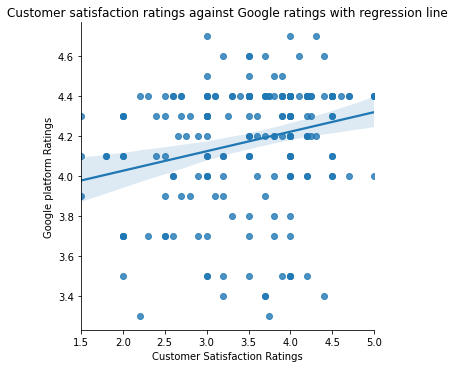

In [24]:
sns.lmplot(x='overall',y='Google',data=reco_features,fit_reg=True)
plt.title("Customer satisfaction ratings against Google ratings with regression line")
plt.xlabel('Customer Satisfaction Ratings')
plt.ylabel('Google platform Ratings')
# scatter plot with regression line 
plt.show() # displaying only chart without the extra information

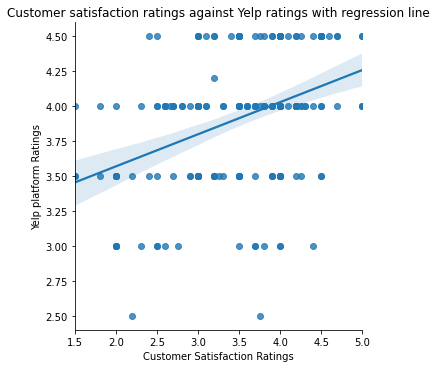

In [25]:
sns.lmplot(x='overall',y='Yelp',data=reco_features,fit_reg=True)
plt.title("Customer satisfaction ratings against Yelp ratings with regression line")
plt.xlabel('Customer Satisfaction Ratings')
plt.ylabel('Yelp platform Ratings')
# scatter plot with regression line 
plt.show() # displaying only chart without the extra information

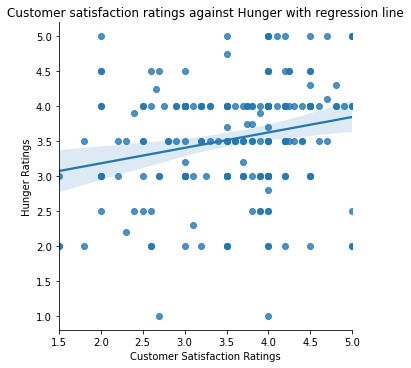

In [31]:
sns.lmplot(x='overall',y='Hunger',data=reco_features,fit_reg=True)
plt.title("Customer satisfaction ratings against Hunger with regression line")
plt.xlabel('Customer Satisfaction Ratings')
plt.ylabel('Hunger Ratings')
# scatter plot with regression line 
plt.show() # displaying only chart without the extra information

In [26]:
# year over year avg cost of burrito
cost_year = burritos[['Location','Burrito','Cost','year']]
cost_year = cost_year[cost_year['Cost']>0] 
cost_over_year = cost_year.groupby('year')['Cost'].mean()
cost_over_year = DataFrame(cost_over_year)
print("Year over year comparison of avg cost of a burrito")
cost_over_year.head(5)

Year over year comparison of avg cost of a burrito


,Cost
year,
2016,6.89116
2017,7.58000


In [27]:
rev_platform = burritos[['Location','Google','Yelp','overall','year']]
rev_platform_year = rev_platform.groupby('year').mean()
print("Year over year comparison of avg ratings")
rev_platform_year.head(5)

Year over year comparison of avg ratings


,Google,Yelp,overall
year,,,
2016,4.182927,3.899652,3.556396
2017,4.187952,3.867470,3.764881


In [28]:
# reviewer trend year over year
reviewer_features = burritos[['Reviewer','overall','year']] 
reviewer_features_2016 = reviewer_features['year'] == 2016
reviewer_features_2016 = reviewer_features.loc[reviewer_features_2016,:]
reviewer_features_2016 = reviewer_features_2016.groupby(['Reviewer'],as_index=False).mean()
# saving groupby outcome as dataframe
reviewer_features_2017 = reviewer_features['year'] == 2017
reviewer_features_2017 = reviewer_features.loc[reviewer_features_2017,:]
reviewer_features_2017 = reviewer_features_2017.groupby(['Reviewer'],as_index=False).mean()
#reviewer_features_2017 = DataFrame(reviewer_features_2017)
merged= pd.merge(left=reviewer_features_2016,right=reviewer_features_2017,on='Reviewer')
merged['Diff']= merged['overall_x']- merged['overall_y']
merged

,Reviewer,overall_x,year_x,overall_y,year_y,Diff
0,elynn,3.750000,2016,4.000000,2017,-0.250000
1,emily,3.415909,2016,3.903571,2017,-0.487662
2,erik,3.000000,2016,4.100000,2017,-1.100000
3,hannah,4.000000,2016,3.500000,2017,0.500000
4,luis,4.287500,2016,3.700000,2017,0.587500
5,ricardo,3.660714,2016,3.500000,2017,0.160714
6,richard,3.483333,2016,3.437500,2017,0.045833
7,sage,3.400833,2016,4.075000,2017,-0.674167
8,scott,3.409596,2016,3.740000,2017,-0.330404
9,tom,3.733333,2016,3.166667,2017,0.566667


In [58]:
# Hunger to reviews correlation

text_rev = burritos[['Reviewer','overall','Notes','Hunger']]
text_rev = text_rev.fillna(0)
text_rev['HasNotes'] = np.where(text_rev['Notes']==0,0,1)
text_rev.head(50)
text_rev.corr()

#sns.lmplot(x='Hunger',y='HasNotes',data=text_rev,fit_reg=False)

,overall,Hunger,HasNotes
overall,1.000000,0.119221,-0.150278
Hunger,0.119221,1.000000,-0.052749
HasNotes,-0.150278,-0.052749,1.000000


In [29]:
burritos_cost_features = burritos[['Location','Synergy','Burrito','Cost','Chips','Beef','Pico','Guac','Cheese','Fries','Sour cream','Pork','Chicken','Shrimp','Fish','Rice','Beans','Lettuce','Tomato','Bell peper','Carrots','Cabbage','Sauce','SalsaIng','Cilantro','Onion','Taquito','Pineapple','Ham','Chile relleno','Nopales','Lobster','Queso','Egg','Mushroom','Bacon','Sushi','Avocado','Corn','Zucchini','year','overall']]
burritos_cost_features = burritos_cost_features[burritos_cost_features['Cost']>0] 
# only considering records with cost more than zero. only 7 records impacted
burritos_cost_features = burritos_cost_features[burritos_cost_features['Synergy']>0] 
# only considering records with cost more than zero. only 2 records impacted
burritos_cost_features = burritos_cost_features.fillna(0)
# filling all NaN with 0. Assuming missing x implies ingredient was not added 
burritos_cost_features = burritos_cost_features.drop(['Queso'],axis=1)
# dropping queso as the column is empty
burritos_cost_features= burritos_cost_features.astype({'Chips':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Beef':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Pico':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Guac':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Cheese':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Fries':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Sour cream':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Pork':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Chicken':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Shrimp':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Fish':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Rice':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Beans':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Lettuce':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Tomato':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Bell peper':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Carrots':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Cabbage':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Sauce':'int64'})
burritos_cost_features= burritos_cost_features.astype({'SalsaIng':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Cilantro':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Onion':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Taquito':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Pineapple':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Ham':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Chile relleno':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Nopales':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Lobster':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Egg':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Mushroom':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Bacon':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Sushi':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Avocado':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Corn':'int64'})
burritos_cost_features= burritos_cost_features.astype({'Zucchini':'int64'})
# converted all string columns to int so that correlation and model fitting is possible

burritos_cost_features['ingcheck'] = burritos_cost_features.loc[:,'Chips':'Zucchini'].sum(axis=1)
# checking for records where no ingredient is used
burritos_cost_features = burritos_cost_features[burritos_cost_features['ingcheck']>0] 
# removing records where no ingredient is used
burritos_cost_features.head(50)

,Location,Synergy,Burrito,Cost,Chips,Beef,Pico,Guac,Cheese,Fries,...,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,year,overall,ingcheck
147,albertacos,4.0,california,5.70,0,1,1,1,1,1,...,0,0,0,0,0,0,0,2016,3.70,6
148,albertacos,3.5,carne asada,5.25,0,1,1,1,0,0,...,0,0,0,0,0,0,0,2016,3.20,3
182,burros and fries,4.0,carne asada,6.89,0,1,1,1,0,0,...,0,0,0,0,0,0,0,2016,4.00,3
181,burros and fries,3.5,california,6.89,0,1,1,0,1,1,...,0,0,0,0,0,0,0,2016,3.50,5
258,california burrito company,2.0,fajitas,6.50,0,1,0,0,1,0,...,0,0,0,0,0,0,0,2016,2.20,4
252,california burrito company,3.0,dave's california,6.50,0,1,0,0,1,1,...,0,0,0,0,0,0,0,2016,3.30,5
253,california burrito company,4.0,california,5.50,0,1,0,0,1,1,...,0,0,0,0,0,0,0,2016,3.50,4
254,california burrito company,4.5,california,5.50,0,1,0,0,1,1,...,0,0,0,0,0,0,0,2016,3.50,4
171,california burritos,3.5,california everything,6.25,0,1,1,1,1,1,...,0,0,0,0,0,0,0,2016,3.40,5
172,california burritos,4.5,california everything,6.25,0,1,1,1,1,1,...,0,0,0,0,0,0,0,2016,0.00,5


In [30]:
# ordinary least sqaures regression model to fit synergy against ingredients of the order
# Data quality and quantity not sufficient for training and testing sets. Using the entire set to model
# null hypothesis = there is no significant relationship between synergy and chosen independent variables 
import numpy as np
import statsmodels.api as sm
lm_features = ['Chips','Beef','Pico','Guac','Cheese','Fries','Sour cream','Pork','Chicken','Shrimp','Fish','Rice','Beans','Lettuce','Tomato','Bell peper','Carrots','Cabbage','Sauce','SalsaIng','Cilantro','Onion','Taquito','Pineapple','Ham','Chile relleno','Nopales','Lobster','Egg','Mushroom','Bacon','Sushi','Avocado','Corn','Zucchini']
y = burritos_cost_features['Synergy']
x = burritos_cost_features[lm_features]
model = sm.OLS(y,x).fit()
model.summary()

# R2 = .932. Indicates 93.2% variation in data can be explained by the model
# variables with significance (p<0.05 ; prob that null hypo is true) are 
# zuchini , sushi, bacon, mushroom, Chile relleno,Sauce,lettuce, fish,chicken,pork,guac,beef,chips 
# 
#model.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Synergy   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                              86.03
Date:                Fri, 05 Feb 2021   Prob (F-statistic):                   6.08e-109
Time:                        09:01:45   Log-Likelihood:                         -343.00
No. Observations:                 254   AIC:                                      756.0
Df Residuals:                     219   BIC:                                      879.8
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Chips             0.5140      0.233      2.202      0.029       0.054       0.974
Beef              2.4565      0.237     10.375      0.000       1.990       2.923
Pico              0.3118      0.167      1.868      0.063      -0.017       0.641
Guac              0.3446      0.168      2.054      0.041       0.014       0.675
Cheese            0.1850      0.233      0.793      0.428      -0.275       0.645
Fries             0.3489      0.229      1.527      0.128      -0.102       0.799
Sour cream        0.2461      0.176      1.395      0.164      -0.102       0.594
Pork              2.5662      0.253     10.152      0.000       2.068       3.064
Chicken           1.8852      0.331      5.697      0.000       1.233       2.537
Shrimp           -0.0528      0.409     -0.129      0.897      -0.859       0.753
Fish              3.2542      0.845      3.852      0.000       1.589       4.919
Rice             -0.1971      0.270     -0.731      0.466      -0.728       0.334
Beans             0.2078      0.268      0.774      0.440      -0.321       0.737
Lettuce           1.4719      0.451      3.264      0.001       0.583       2.361
Tomato           -0.7297      0.576     -1.267      0.207      -1.865       0.406
Bell peper        0.0231      0.664      0.035      0.972      -1.286       1.332
Carrots          -1.7516      1.106     -1.583      0.115      -3.932       0.429
Cabbage           0.4747      0.711      0.667      0.505      -0.927       1.877
Sauce             0.7663      0.282      2.716      0.007       0.210       1.322
SalsaIng         -0.6503      0.488     -1.333      0.184      -1.612       0.311
Cilantro          0.2101      0.817      0.257      0.797      -1.401       1.821
Onion             0.2429      0.819      0.297      0.767      -1.370       1.856
Taquito           0.7401      0.546      1.355      0.177      -0.336       1.816
Pineapple         0.3588      0.454      0.791      0.430      -0.535       1.253
Ham               0.3901      1.131      0.345      0.730      -1.838       2.618
Chile relleno     1.3128      0.573      2.291      0.023       0.184       2.442
Nopales           0.0940      0.552      0.170      0.865      -0.994       1.182
Lobster           2.4887      1.476      1.686      0.093      -0.420       5.398
Egg              -0.1230      0.716     -0.172      0.864      -1.535       1.289
Mushroom         -3.0339      0.895     -3.391      0.001      -4.797      -1.270
Bacon             3.7326      0.928      4.023      0.000       1.904       5.561
Sushi             3.7430      0.721      5.194      0.000       2.323       5.163
Avocado          -0.5623      0.523     -1.074      0.284      -1.594       0.469
Corn             -0.3601      0.

In [61]:
# rebuild model using only significant variables
import numpy as np
import statsmodels.api as sm
 # zuchini , sushi, bacon, mushroom, Chile relleno,Sauce,lettuce, fish,chicken,pork,guac,beef,chips 
lm_features_new = ['Bacon','Chile relleno','Zucchini','Mushroom','Sushi','Sauce','Lettuce','Fish','Chicken','Pork','Guac','Beef','Chips']

y = burritos_cost_features['Synergy']
x = burritos_cost_features[lm_features_new]

model_new = sm.OLS(y,x).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Synergy   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              210.0
Date:                Fri, 05 Feb 2021   Prob (F-statistic):                   2.52e-123
Time:                        04:47:08   Log-Likelihood:                         -365.79
No. Observations:                 254   AIC:                                      757.6
Df Residuals:                     241   BIC:                                      803.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bacon             3.8745      0.664      5.837      0.000       2.567       5.182
Chile relleno     1.3468      0.553      2.436      0.016       0.258       2.436
Zucchini          6.8924      1.396      4.937      0.000       4.142       9.643
Mushroom         -3.7268      0.817     -4.562      0.000      -5.336      -2.118
Sushi             3.7938      0.750      5.057      0.000       2.316       5.272
Sauce             0.5632      0.203      2.776      0.006       0.164       0.963
Lettuce           1.2712      0.364      3.494      0.001       0.555       1.988
Fish              3.4221      0.448      7.635      0.000       2.539       4.305
Chicken           2.3046      0.260      8.863      0.000       1.792       2.817
Pork              2.9452      0.184     16.001      0.000       2.583       3.308
Guac              0.3725      0.145      2.568      0.011       0.087       0.658
Beef              3.1033      0.129     24.126      0.000       2.850       3.357
Chips             0.4124      0.229      1.801      0.073      -0.039       0.863
==============================================================================
Omnibus:                       10.309   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               21.455
Skew:                           0.003   Prob(JB):                     2.19e-05
Kurtosis:                       4.424   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
name_check = burritos[['Burrito','overall','Rec','Cost']]
#name_check.head(50)
name_check['cali'] = name_check['Burrito'].str.contains('california')
name_check.head(50)
name_check.corr()



<ipython-input-63-97c610567454>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_check['cali'] = name_check['Burrito'].str.contains('california')


,overall,Rec,Cost,cali
overall,1.000000,0.767938,0.125067,0.181193
Rec,0.767938,1.000000,0.168015,0.124420
Cost,0.125067,0.168015,1.000000,-0.024181
cali,0.181193,0.124420,-0.024181,1.000000
